In [9]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [41]:
def convert_to_yolo(json_file):
    with open(json_file, 'r', encoding = 'utf-8', errors='ignore') as f:
        data = json.load(f)
            
    yolo_data = ''
    image_width = data['description']['imageWidth']
    image_height = data['description']['imageHeight']

    for obj in data['annotations']['PM']:
        if obj['PM_code'] == '36':
            label = 22
        
        elif obj['PM_code'] == '35':
            label = 21
            
        else:
            label = int(obj['PM_code']) - 13
        bbox = obj['points']

        x, y, bbox_width, bbox_height = bbox
            
        # 중심 좌표와 너비, 높이를 YoloV5 형식으로 변환.
        # 크기를 0과 1사이로 정규화시켜서 이미지의 사이즈가 다르더라도 예측을 잘 수행할 수 있도록 함
        x_center = (x + bbox_width / 2) / image_width
        y_center = (y + bbox_height / 2) / image_height
        bbox_width = bbox_width / image_width
        bbox_height = bbox_height / image_height

        yolo_data += f"{label} {x_center} {y_center} {bbox_width} {bbox_height}\n"
    
    yolo_file = 'data/yolov5_label/' + json_file.split('/')[-1].split('.')[0] + '.txt'
    with open(yolo_file, 'w') as f:
        f.write(yolo_data)
    
    return yolo_data

In [42]:
label_list = os.listdir('data/sample_label')
label_list = ['data/sample_label/' + name for name in label_list]
len(label_list)

13323

In [43]:
for file_name in tqdm(label_list):
    convert_to_yolo(file_name)

100%|██████████| 13323/13323 [00:16<00:00, 797.47it/s]


In [26]:
with open('data/sample_label/S000566_072_0150_C_D_F_0.json', 'r') as f:
    lab = json.load(f)
print(json.dumps(lab, indent = 4))

{
    "info": {
        "video_id": "S000566",
        "clip_id": "072",
        "device": "C",
        "time": "D",
        "weather": "F",
        "is_scripted": "0"
    },
    "description": {
        "frame_id": "0150",
        "imageWidth": 1920,
        "imageHeight": 1080
    },
    "annotations": {
        "environment": [
            {
                "area_code": "1",
                "shape_type": "polygon",
                "points": [
                    [
                        334.4366504755655,
                        1381.6762546585437
                    ],
                    [
                        320.9576967749015,
                        1325.7974190159423
                    ],
                    [
                        334.4366504755655,
                        1300.748285796845
                    ],
                    [
                        361.3945578768934,
                        1283.406578183624
                    ],
                    [
      

In [29]:
a = np.array(lab['annotations']['PM'][0]['points'])
x = int(a[0])
y = int(a[1])
w = int(a[2])
h = int(a[3])

In [30]:
a = np.array(lab['annotations']['PM'][1]['points'])
x2 = int(a[0])
y2 = int(a[1])
w2 = int(a[2])
h2 = int(a[3])

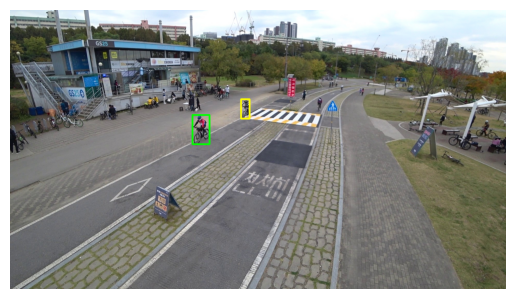

In [31]:
img_path = './data/input/CCTV/주간/맑음/실증/S000566_072_0150_C_D_F_0.jpg'
img1 = cv2.imread(img_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img1)

cv2.rectangle(img1, (x,y), (x+w, y+h), (0, 255, 0), 5)
cv2.rectangle(img1, (x2,y2), (x2+w2, y2+h2), (255, 255, 0), 5)
plt.imshow(img1)